# Building the models

## KNN model

In [37]:
knn = KNeighborsClassifier(n_neighbors=5, metric = "euclidean")

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

### Evaluation of the KNN model

In [38]:
print(confusion_matrix(y_test, pred))
print("===========================================================")
print(classification_report(y_test, pred))

[[169  35]
 [ 60  36]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       204
           1       0.51      0.38      0.43        96

    accuracy                           0.68       300
   macro avg       0.62      0.60      0.61       300
weighted avg       0.66      0.68      0.67       300



In [39]:
print(f"Train Accuracy : {knn.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {knn.score(X_test, y_test):.3f}")

Train Accuracy : 0.796
Test Accuracy : 0.683


### Exploring the model using Grid search cv

In [40]:
knn_gs = KNeighborsClassifier()


In [41]:
parameters = {
    "n_neighbors": [2, 3, 21, 22],
    "metric": ["minkowski", "euclidean"],
    "weights": ["uniform", "distance"],
    "p": [1,2,3,4,5]
}


grid_search = GridSearchCV(estimator = knn_gs, 
                           param_grid = parameters, 
                           scoring = "accuracy", 
                           cv = 10)

In [42]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': [2, 3, 21, 22], 'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [43]:
grid_search.best_params_

{'metric': 'minkowski', 'n_neighbors': 21, 'p': 1, 'weights': 'distance'}

In [44]:
accuracy = grid_search.best_score_
accuracy

0.7228571428571429

In [45]:
knn_model = KNeighborsClassifier(n_neighbors = 21, p = 2, weights = "uniform")

In [46]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [47]:
print(f"Train Accuracy : {knn_model.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {knn_model.score(X_test, y_test):.3f}")

Train Accuracy : 0.734
Test Accuracy : 0.720


In [48]:
pred = knn_model.predict(X_test)

print(confusion_matrix(y_test, pred))
print("===========================================================")
print(classification_report(y_test, pred))

[[194  10]
 [ 74  22]]
              precision    recall  f1-score   support

           0       0.72      0.95      0.82       204
           1       0.69      0.23      0.34        96

    accuracy                           0.72       300
   macro avg       0.71      0.59      0.58       300
weighted avg       0.71      0.72      0.67       300



In [49]:
cv = ShuffleSplit(test_size =0.2, random_state = 101)

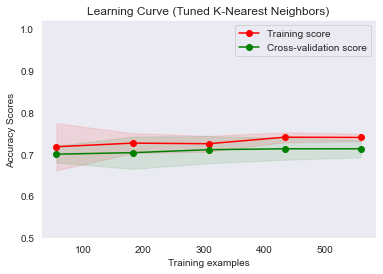

In [50]:
### Learning Curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Scores")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1,color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X, y = X_train, y_train

title = "Learning Curve (Tuned K-Nearest Neighbors)"
cv = ShuffleSplit(test_size=0.2, random_state=0)

plot_learning_curve(knn_model, title, X, y, ylim=(0.5, 1.02), cv=cv, n_jobs=4)


plt.show()

## Logistic Regression

In [51]:
logmode = LogisticRegression()

In [52]:
logmode.fit(X_train, y_train)

LogisticRegression()

In [53]:
predictions = logmode.predict(X_test)

In [54]:
logmode.intercept_, logmode.coef_

(array([-0.99458002]),
 array([[-0.12497212, -0.12630405,  0.0728758 ,  0.15995021,  0.02037077,
          0.43865427, -0.08121654,  0.5275504 ,  0.24002978]]))

**** Evaluation of the data

In [55]:
print(f"Train Accuracy : {logmode.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {logmode.score(X_test, y_test):.3f}")

Train Accuracy : 0.707
Test Accuracy : 0.700


In [56]:
confusion_matrix(y_test, predictions)

array([[193,  11],
       [ 79,  17]], dtype=int64)

In [57]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       204
           1       0.61      0.18      0.27        96

    accuracy                           0.70       300
   macro avg       0.66      0.56      0.54       300
weighted avg       0.68      0.70      0.64       300



### Best Parameter

In [58]:
log_gs = LogisticRegression()

In [59]:
parameter = {
    "C": np.logspace(-4, 4, 20), 
    "solver": ["newton-cg", "lbfgs", "liblinear"], 
}

In [60]:
grid_search = GridSearchCV(log_gs, parameter, scoring = "accuracy",cv = 10, verbose = True, n_jobs = 1)


In [61]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=True)

In [62]:
print(grid_search.best_params_)

{'C': 0.012742749857031334, 'solver': 'newton-cg'}


In [63]:
accuracy = grid_search.best_score_
accuracy

0.7157142857142857

In [64]:
grid_search.best_estimator_

LogisticRegression(C=0.012742749857031334, solver='newton-cg')

In [65]:
log_model = LogisticRegression(C = 0.012742749857031334, solver='newton-cg')

In [66]:
log_model.fit(X_train, y_train)

LogisticRegression(C=0.012742749857031334, solver='newton-cg')

In [67]:
print(f"Train Accuracy : {log_model.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {log_model.score(X_test, y_test):.3f}")

Train Accuracy : 0.720
Test Accuracy : 0.697


In [68]:
print(confusion_matrix(y_test, pred))
print("===========================================================")
print(classification_report(y_test, pred))

[[195   9]
 [ 80  16]]
              precision    recall  f1-score   support

           0       0.71      0.96      0.81       204
           1       0.64      0.17      0.26        96

    accuracy                           0.70       300
   macro avg       0.67      0.56      0.54       300
weighted avg       0.69      0.70      0.64       300



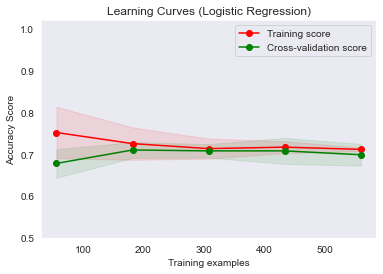

In [69]:
### Learning Curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1,color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = X_train, y_train


title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.02), cv=cv, n_jobs=4)

plt.show()

## Naive bayes

In [70]:
naive_bayes = GaussianNB()

In [71]:
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [72]:
pred = naive_bayes.predict(X_test)

In [73]:
print(f"Train Accuracy : {naive_bayes.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {naive_bayes.score(X_test, y_test):.3f}")

Train Accuracy : 0.719
Test Accuracy : 0.717


In [74]:
accuracy_score(y_test, pred)

0.7166666666666667

In [75]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[182,  22],
       [ 63,  33]], dtype=int64)

In [76]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       204
           1       0.60      0.34      0.44        96

    accuracy                           0.72       300
   macro avg       0.67      0.62      0.62       300
weighted avg       0.70      0.72      0.69       300



### Best Parameter

In [77]:
nb_gs = GaussianNB()


In [78]:
parameters = {
    "var_smoothing": np.logspace(0, -9, num = 100), 
}


grid_search = GridSearchCV(estimator = nb_gs, 
                           param_grid = parameters, 
                           scoring = "accuracy", 
                           cv = 10, 
                           n_jobs = -1)

In [79]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [80]:
nb_gs.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [81]:
grid_search.best_params_

{'var_smoothing': 1.0}

In [82]:
accuracy = grid_search.best_score_
accuracy

0.7257142857142858

In [83]:
grid_search.best_estimator_

GaussianNB(var_smoothing=1.0)

In [84]:
nb_model = GaussianNB(var_smoothing = 8.111308307896873e-06)

In [85]:
nb_model.fit(X_train, y_train)

GaussianNB(var_smoothing=8.111308307896873e-06)

In [86]:
print(f"Train Accuracy : {nb_model.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {nb_model.score(X_test, y_test):.3f}")

Train Accuracy : 0.719
Test Accuracy : 0.717


In [87]:
pred = nb_model.predict(X_test)

print(confusion_matrix(y_test, pred))
print("===========================================================")
print(classification_report(y_test, pred))

[[182  22]
 [ 63  33]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       204
           1       0.60      0.34      0.44        96

    accuracy                           0.72       300
   macro avg       0.67      0.62      0.62       300
weighted avg       0.70      0.72      0.69       300



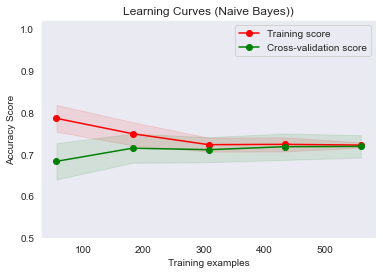

In [88]:
### Learning Curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1,color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = X_train, y_train


title = "Learning Curves (Naive Bayes))"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.02), cv=cv, n_jobs=4)

plt.show()

## Support Vector Machines

In [89]:
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)

SVC()

In [90]:
y_pred = svc_classifier.predict(X_test)

In [91]:
confusion_matrix(y_test, y_pred)

array([[194,  10],
       [ 78,  18]], dtype=int64)

In [92]:
print(f"Train Accuracy : {svc_classifier.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {svc_classifier.score(X_test, y_test):.3f}")

Train Accuracy : 0.781
Test Accuracy : 0.707


In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.95      0.82       204
           1       0.64      0.19      0.29        96

    accuracy                           0.71       300
   macro avg       0.68      0.57      0.55       300
weighted avg       0.69      0.71      0.65       300



### Best Parameter

In [94]:
svm_gs = SVC()


In [95]:
parameters = {
    'kernel': ['rbf','poly'], 
    'degree': [1, 2, 3, 4, 5, 6, 7]
}


grid_search = GridSearchCV(estimator = svm_gs, 
                           param_grid = parameters, 
                           scoring = "accuracy", 
                           cv = 5, 
                           n_jobs = -1)

In [96]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'degree': [1, 2, 3, 4, 5, 6, 7],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy')

In [97]:
grid_search.best_params_

{'degree': 2, 'kernel': 'poly'}

In [98]:
accuracy = grid_search.best_score_
accuracy

0.7142857142857143

In [99]:
grid_search.best_estimator_

SVC(degree=2, kernel='poly')

In [100]:
svm_model = SVC(degree=6, kernel='poly')

In [101]:
svm_model.fit(X_train, y_train)

SVC(degree=6, kernel='poly')

In [102]:
print(f"Train Accuracy : {svm_model.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {svm_model.score(X_test, y_test):.3f}")

Train Accuracy : 0.829
Test Accuracy : 0.693


In [103]:
pred = svm_model.predict(X_test)

print(confusion_matrix(y_test, pred))
print("===========================================================")
print(classification_report(y_test, pred))

[[192  12]
 [ 80  16]]
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       204
           1       0.57      0.17      0.26        96

    accuracy                           0.69       300
   macro avg       0.64      0.55      0.53       300
weighted avg       0.66      0.69      0.63       300



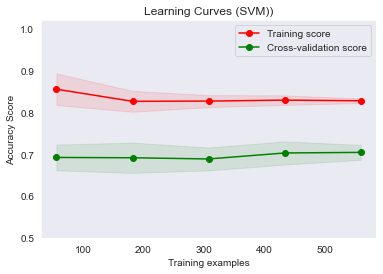

In [104]:
### Learning Curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1,color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = X_train, y_train


title = "Learning Curves (SVM))"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(test_size=0.2, random_state=0)

estimator = svm_model
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.02), cv=cv, n_jobs=4)

plt.show()

## Decision Trees

In [105]:
dtree = DecisionTreeClassifier()

In [106]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [107]:
pred = dtree.predict(X_test)

In [108]:
print(f"Train Accuracy : {dtree.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {dtree.score(X_test, y_test):.3f}")

Train Accuracy : 1.000
Test Accuracy : 0.667


In [109]:
print(confusion_matrix(y_test, pred))
print("===========================================================")
print(classification_report(y_test, pred))

[[156  48]
 [ 52  44]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       204
           1       0.48      0.46      0.47        96

    accuracy                           0.67       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.66      0.67      0.66       300



### Best Parameter

In [110]:
dtree_gs = DecisionTreeClassifier()


In [111]:
parameters = {
    'criterion': ['gini','entropy'], 
    'min_samples_split': [2 ,4 ,6 ,8 ,10 ,15]
}


grid_search = GridSearchCV(estimator = dtree_gs, 
                           param_grid = parameters, 
                           scoring = "accuracy", 
                           cv = 5, 
                           n_jobs = -1)

In [112]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 6, 8, 10, 15]},
             scoring='accuracy')

In [113]:
grid_search.best_params_

{'criterion': 'gini', 'min_samples_split': 8}

In [114]:
accuracy = grid_search.best_score_
accuracy

0.7185714285714286

In [115]:
grid_search.best_estimator_

DecisionTreeClassifier(min_samples_split=8)

In [116]:
dtree_model = DecisionTreeClassifier(min_samples_split=15)

In [117]:
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=15)

In [118]:
print(f"Train Accuracy : {dtree_model.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {dtree_model.score(X_test, y_test):.3f}")

Train Accuracy : 0.874
Test Accuracy : 0.703


In [119]:
pred = dtree_model.predict(X_test)

print(confusion_matrix(y_test, pred))
print("===========================================================")
print(classification_report(y_test, pred))

[[171  33]
 [ 56  40]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       204
           1       0.55      0.42      0.47        96

    accuracy                           0.70       300
   macro avg       0.65      0.63      0.63       300
weighted avg       0.69      0.70      0.69       300



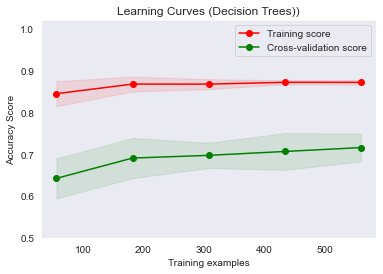

In [120]:
### Learning Curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1,color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = X_train, y_train


title = "Learning Curves (Decision Trees))"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(test_size=0.2, random_state=0)

estimator = dtree_model
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.02), cv=cv, n_jobs=4)

plt.show()